# 5002 Project

## Task 1: Average Travel Time Estimation

In [1]:
import feature
import model
import matplotlib.pyplot as plt
import utils

In [2]:
# Load data
dataset_train, dataset_test = feature.load()

In [6]:
# Implement a LGBM model
lgbm = model.LGBM(lr=5e-2, boosting_type='gbdt', obj='regression', metric='rmse', bagging_freq=1, bagging_fraction=0.8, feature_fraction=0.4)

In [7]:
lgbm.train(dataset_train, val_proportion=0.2, max_round=150)

number of training data = 19822
number of validation data = 4965
round: 20/150
round: 40/150
round: 60/150
round: 80/150
round: 100/150
round: 120/150
round: 140/150


lowest MAPE = 0.23985157932843662
best_boost_round = 150


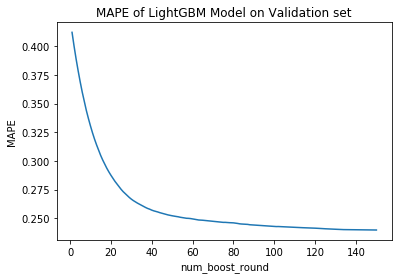

In [8]:
# Visualize the MAPE curve
print("lowest MAPE = %s" % lgbm.lowest_MAPE_)
print("best_boost_round = %s" % lgbm.best_boost_round_)

plt.title("MAPE of LightGBM Model on Validation set")
plt.xlabel("num_boost_round")
plt.ylabel("MAPE")
plt.plot(range(1,151), lgbm.MAPE_history_)
plt.show()

# You can try several times, the lowest MAPE is not unique
# Our best lowest MAPE can reach 0.23

In [9]:
# Generate submittion.csv
pred_time = lgbm.predict(dataset_test)
utils.get_submission("lgbm_submission.csv", pred_time)

In [12]:
# Implement a Random Forest model
rf = model.RandomForestRegression()
rf.train(dataset_train, val_proportion=0.2, max_n_estimators=30)

number of training data = 19824
number of validation data = 4963
n_estimators: 2/30
n_estimators: 4/30
n_estimators: 6/30
n_estimators: 8/30
n_estimators: 10/30
n_estimators: 12/30
n_estimators: 14/30
n_estimators: 16/30
n_estimators: 18/30
n_estimators: 20/30
n_estimators: 22/30
n_estimators: 24/30
n_estimators: 26/30
n_estimators: 28/30
n_estimators: 30/30


lowest MAPE = 0.2475620669078443
best_n_estimators = 30


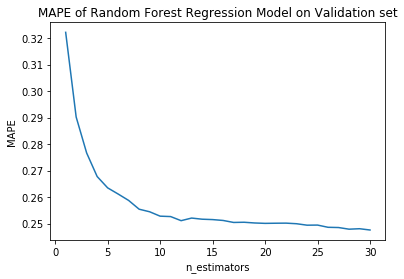

In [14]:
# Visualize the MAPE curve
print("lowest MAPE = %s" % rf.lowest_MAPE_)
print("best_n_estimators = %s" % rf.best_n_estimators_)

plt.title("MAPE of Random Forest Regression Model on Validation set")
plt.xlabel("n_estimators")
plt.ylabel("MAPE")
plt.plot(range(1,31), rf.MAPE_history_)
plt.show()

# You can try several times, the lowest MAPE is not unique
# Our best lowest MAPE can reach 0.24

In [15]:
# Generate submittion.csv
pred_time = rf.predict(dataset_test)
utils.get_submission("rf_submission.csv", pred_time)

In [16]:
# import pytorch, we'll implement two Neural Network models
import torch

# Check whether GPU is available
torch.cuda.is_available()

True

In [17]:
# Use GPU to accelerate
device = torch.device('cuda')

number of training data = 19833
number of validation data = 4954
iteration: 0/500
iteration: 100/500
iteration: 200/500
iteration: 300/500
iteration: 400/500
lowest MAPE = 0.2673541108767192


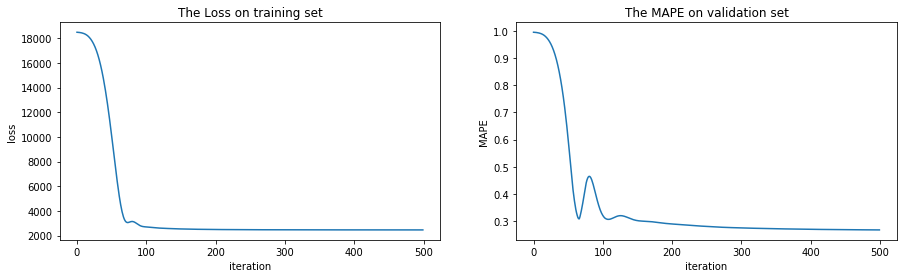

In [22]:
# Feedforward Neural Network
fnn = model.FNN(D_in=121, H1=5, H2=3, D_out=1, iteration=500, lr=1e-2, device=device)
# Train network
fnn.train(dataset_train, val_proportion=0.2)

# Print lowest MAPE
print("lowest MAPE = %s" % fnn.lowest_MAPE_)

# Plot the loss curve and MAPE on validation set
fnn.visualize()

# You can try several times, the lowest MAPE is not unique
# Our best lowest MAPE can reach 0.25

In [23]:
pred_time = fnn.predict(dataset_test).cpu().detach().numpy()
utils.get_submission("fnn_submission.csv", pred_time)

number of training data = 22313
number of validation data = 2474
iteration: 0/500
iteration: 100/500
iteration: 200/500
iteration: 300/500
iteration: 400/500
lowest MAPE = 0.19870529572168985


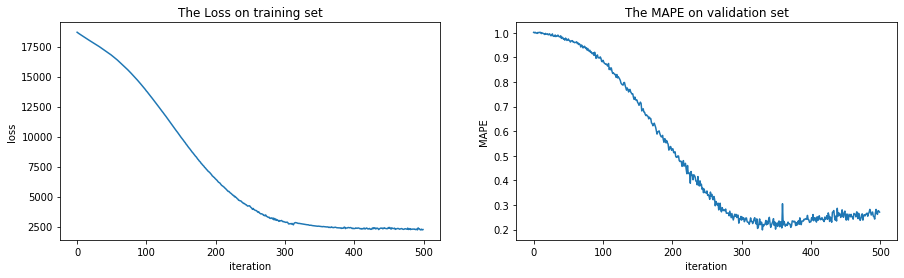

In [27]:
# Bilinear-Based Res Network
nn = model.NN(D_in=121, H=64, D_out=1, iteration=500, lr=8e-4, device=device)
# Train network
nn.train(dataset_train, val_proportion=0.1)

# Print lowest MAPE
print("lowest MAPE = %s" % nn.lowest_MAPE_)

# Plot the loss curve and MAPE on validation set
nn.visualize()

# You can try several times, the lowest MAPE is not unique
# Our best lowest MAPE can reach 0.19

In [28]:
pred_time = nn.predict(dataset_test).cpu().detach().numpy()
utils.get_submission("bilinear_res_submission.csv", pred_time)